In [1]:
import pandas as pd

In [4]:
import pandas as pd
import statsmodels.api as sm

In [5]:
import statsmodels.api as sm

In [8]:
df = pd.read_csv('cars.csv')
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.07027,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,16175.95760,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,15731.13290,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,15118.89323,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.Model.unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [10]:
df.Model.value_counts()

Cavalier       60
Malibu         60
AVEO           60
Ion            50
Cobalt         50
9_3 HO         40
Monte Carlo    30
Vibe           30
Deville        30
Lacrosse       30
9_5            30
Impala         30
Bonneville     30
Grand Prix     30
9_5 HO         20
Grand Am       20
Lesabre        20
Corvette       20
Park Avenue    20
G6             20
9_3            20
CTS            10
Classic        10
STS-V6         10
STS-V8         10
CST-V          10
L Series       10
GTO            10
Century        10
XLR-V8         10
Sunfire        10
9-2X AWD        4
Name: Model, dtype: int64

In [11]:
pd.Categorical(df.Model).codes[0:20]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22], dtype=int8)

In [12]:
df['Model_ord'] = pd.Categorical(df.Model).codes  #values for Model so that they can participate in Stats!

X = df[['Mileage', 'Model_ord', 'Doors']]  #multiple independent variable
y = df[['Price']] #dependent variable

In [14]:
#https://www.statsmodels.org/stable/api.html#statsmodels-api
    
#X1 = sm.add_constant(X)   #Add a column of ones to an array.
check = sm.OLS(y, X).fit() #Ordinary Least Squares   

In [15]:
check.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.768
Model:                            OLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                              883.1
Date:                Sat, 07 Aug 2021   Prob (F-statistic):                   1.95e-253
Time:                        11:09:34   Log-Likelihood:                         -8646.5
No. Observations:                 804   AIC:                                  1.730e+04
Df Residuals:                     801   BIC:                                  1.731e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage        0.1700      0.043      3.963      0.000       0.086       0.254
Model_ord    203.2116     43.022      4.723      0.000     118.763     287.660
Doors       3923.7534    281.702     13.929      0.000    3370.792    4476.715
==============================================================================
Omnibus:                      221.757   Durbin-Watson:                   0.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              524.713
Skew:                           1.465   Prob(JB):                    1.15e-114
Kurtosis:                       5.661   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
y.groupby(df.Doors).mean()

,Price
Doors,
2,23807.135520
4,20580.670749


In [17]:
check = sm.GLS(y, X).fit()  #Generalized Least Squares
check.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.768
Model:                            GLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                              883.1
Date:                Sat, 07 Aug 2021   Prob (F-statistic):                   1.95e-253
Time:                        11:09:52   Log-Likelihood:                         -8646.5
No. Observations:                 804   AIC:                                  1.730e+04
Df Residuals:                     801   BIC:                                  1.731e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage        0.1700      0.043      3.963      0.000       0.086       0.254
Model_ord    203.2116     43.022      4.723      0.000     118.763     287.660
Doors       3923.7534    281.702     13.929      0.000    3370.792    4476.715
==============================================================================
Omnibus:                      221.757   Durbin-Watson:                   0.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              524.713
Skew:                           1.465   Prob(JB):                    1.15e-114
Kurtosis:                       5.661   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
check = sm.WLS(y, X).fit()  #Weighted Least Squares.
check.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.768
Model:                            WLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                              883.1
Date:                Sat, 07 Aug 2021   Prob (F-statistic):                   1.95e-253
Time:                        11:09:59   Log-Likelihood:                         -8646.5
No. Observations:                 804   AIC:                                  1.730e+04
Df Residuals:                     801   BIC:                                  1.731e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage        0.1700      0.043      3.963      0.000       0.086       0.254
Model_ord    203.2116     43.022      4.723      0.000     118.763     287.660
Doors       3923.7534    281.702     13.929      0.000    3370.792    4476.715
==============================================================================
Omnibus:                      221.757   Durbin-Watson:                   0.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              524.713
Skew:                           1.465   Prob(JB):                    1.15e-114
Kurtosis:                       5.661   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
check = sm.GLM(y, X).fit()  #Genaralized Linear Model.
check.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Price   No. Observations:                  804
Model:                            GLM   Df Residuals:                      801
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                      1.2889e+08
Method:                          IRLS   Log-Likelihood:                -8646.5
Date:                Sat, 07 Aug 2021   Deviance:                   1.0324e+11
Time:                        11:10:09   Pearson chi2:                 1.03e+11
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage        0.1700      0.043      3.963      0.000       0.086       0.254
Model_ord    203.2116     43.022      4.723      0.000     118.890     287.533
Doors       3923.7534    281.702     13.929      0.000    3371.628    4475.879
==============================================================================
"""

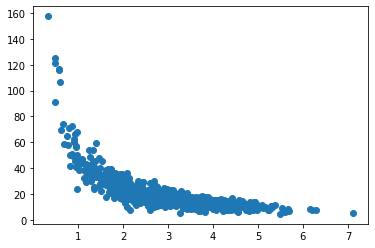

In [20]:
%matplotlib inline
from pylab import *
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds
scatter(pageSpeeds, purchaseAmount)

In [21]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))


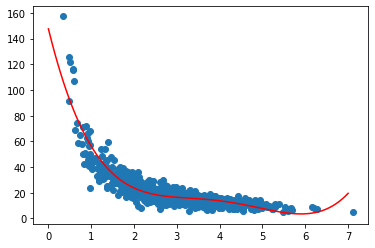

In [23]:
xp = np.linspace(0, 7, 100)
plt.scatter(x,y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [25]:
from pandas.plotting import scatter_matrix

In [26]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [27]:
print(dataset.shape)

(30, 2)


In [28]:
print(dataset.head(20))

    YearsExperience   Salary
0               1.1  39343.0
1               1.3  46205.0
2               1.5  37731.0
3               2.0  43525.0
4               2.2  39891.0
5               2.9  56642.0
6               3.0  60150.0
7               3.2  54445.0
8               3.2  64445.0
9               3.7  57189.0
10              3.9  63218.0
11              4.0  55794.0
12              4.0  56957.0
13              4.1  57081.0
14              4.5  61111.0
15              4.9  67938.0
16              5.1  66029.0
17              5.3  83088.0
18              5.9  81363.0
19              6.0  93940.0


In [29]:
# descriptions
print(dataset.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


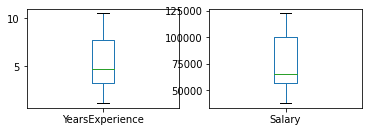

In [31]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

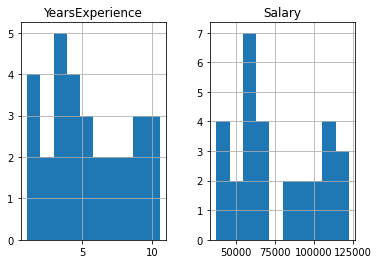

In [32]:
dataset.hist()
plt.show()

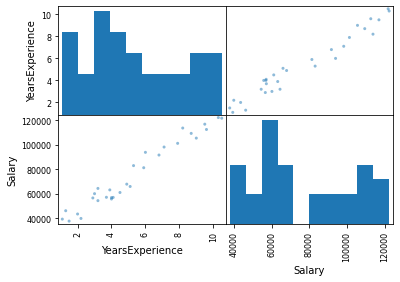

In [33]:
scatter_matrix(dataset)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = regressor.predict(X_test)

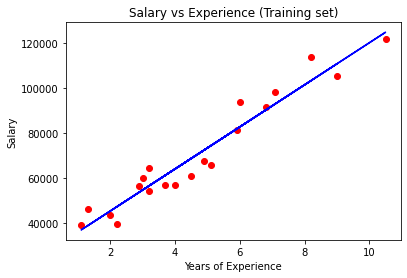

In [37]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

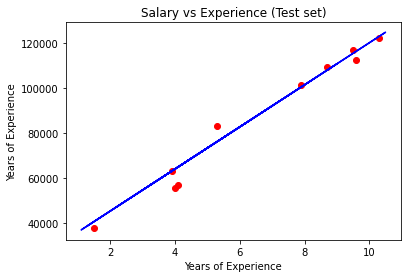

In [38]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Years of Experience')
plt.show()

In [39]:
print(regressor.predict([[12]]))

[138967.5015615]


In [40]:
print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.19224403119


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [42]:
stocks_df = pd.read_csv('stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [43]:
# Sort the stock data by date

stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [44]:
stocks_df.Date.min(),stocks_df.Date.max()

('2012-01-12', '2020-08-11')

In [45]:
print('Total Number of stocks : {}'.format(len(stocks_df.columns[1:])))

Total Number of stocks : 9


In [46]:
print('Stocks under consideration are:')

for i in stocks_df.columns[1:]:  #TEST: try this using List comprehension
  print(i)

Stocks under consideration are:
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


In [47]:
stocks_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [48]:
# Getting dataframe info

stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [49]:
def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (16,8), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

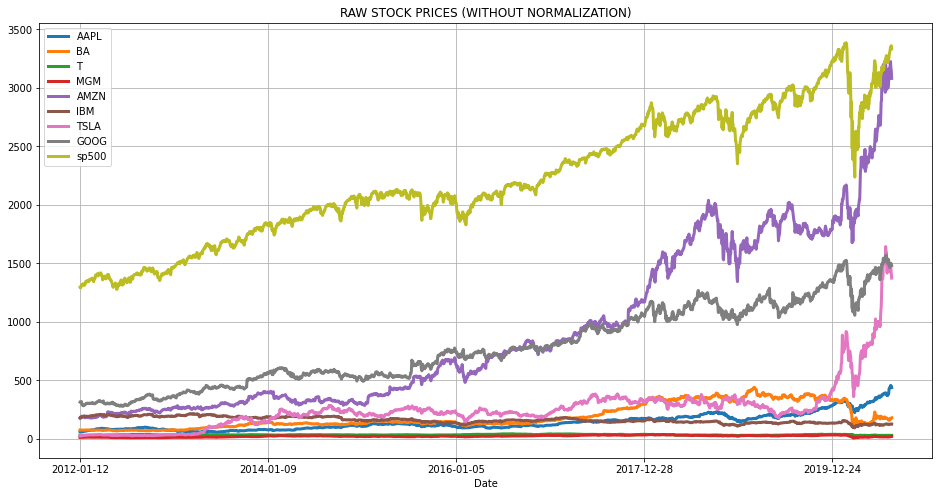

In [50]:
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

In [51]:
# Function to perform an interactive data plotting using plotly express

# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively.

# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance. 

def interactive_plot(df, title):
  fig = px.line(title = title)
  
  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i) # add a new Scatter trace

  fig.show()

In [52]:
import numpy as np
from scipy import stats

A = np.random.normal(25.0, 5.0, 10000)
B = np.random.normal(26.0, 5.0, 10000)

stats.ttest_ind(A, B)

Ttest_indResult(statistic=-16.261803037372296, pvalue=4.411455908389764e-59)

In [53]:
B = np.random.normal(25.0, 5.0, 10000)

stats.ttest_ind(A, B)

Ttest_indResult(statistic=-0.0195888561774269, pvalue=0.984371549037595)

In [54]:
A = np.random.normal(25.0, 5.0, 100000)
B = np.random.normal(25.0, 5.0, 100000)

stats.ttest_ind(A, B)

Ttest_indResult(statistic=-1.0954877639442338, pvalue=0.2733043224425086)

In [55]:
A = np.random.normal(25.0, 5.0, 1000000)
B = np.random.normal(25.0, 5.0, 1000000)

stats.ttest_ind(A, B)

Ttest_indResult(statistic=-0.45865579116340055, pvalue=0.6464814154119792)

In [56]:
stats.ttest_ind(A, A)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [57]:
import pandas as pd #alias
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#from pandas_visual_analysis import VisualAnalysis, DataSource
import os
import seaborn as sns # Statistical data visualization
import scipy as spy
import dtale

In [58]:
file="Nabil.csv"
os.path.exists(file)

True

In [59]:
nabil=pd.read_csv(file)
#nabil = nabil.sort_values(by=['BUSINESSDATE'])
nabil.head()

,BUSINESSDATE,CLOSEPRICE,HIGHPRICE,LOWPRICE,TOTALTRADEDQUANTITY,TOTALTRADEDVALUE,TOTALTRADES
0,7/1/2021,1297,1305,1293,41519,53900000,616
1,6/30/2021,1296,1315,1232,69882,90200000,638
2,6/29/2021,1296,1310,1295,62112,80700000,672
3,6/28/2021,1302,1334,1297,66695,87100000,738
4,6/27/2021,1298,1306,1250,81126,105000000,966


In [60]:
nabil.columns

Index(['BUSINESSDATE', 'CLOSEPRICE', 'HIGHPRICE', 'LOWPRICE',
       'TOTALTRADEDQUANTITY', 'TOTALTRADEDVALUE', 'TOTALTRADES'],
      dtype='object')

In [61]:
[nabil.skew(), nabil.kurtosis(), nabil['HIGHPRICE'].mean(), nabil['HIGHPRICE'].std(), nabil['HIGHPRICE'].mode()]

[CLOSEPRICE             0.430776
 HIGHPRICE              0.667829
 LOWPRICE              -0.092015
 TOTALTRADEDQUANTITY    0.560929
 TOTALTRADEDVALUE       0.633959
 TOTALTRADES            0.330365
 dtype: float64,
 CLOSEPRICE             1.697322
 HIGHPRICE              0.784987
 LOWPRICE              -0.037171
 TOTALTRADEDQUANTITY   -0.350729
 TOTALTRADEDVALUE      -0.183895
 TOTALTRADES           -0.521326
 dtype: float64,
 1325.7096774193549,
 35.955066264132654,
 0    1300
 dtype: int64]

In [62]:
#nabil.corr()
round(nabil.corr(),2)

,CLOSEPRICE,HIGHPRICE,LOWPRICE,TOTALTRADEDQUANTITY,TOTALTRADEDVALUE,TOTALTRADES
CLOSEPRICE,1.00,0.76,0.77,0.52,0.57,0.35
HIGHPRICE,0.76,1.00,0.67,0.46,0.50,0.42
LOWPRICE,0.77,0.67,1.00,0.35,0.39,0.30
TOTALTRADEDQUANTITY,0.52,0.46,0.35,1.00,1.00,0.79
TOTALTRADEDVALUE,0.57,0.50,0.39,1.00,1.00,0.78
TOTALTRADES,0.35,0.42,0.30,0.79,0.78,1.00


In [63]:
highmean=nabil['HIGHPRICE'].mean()
highmean

1325.7096774193549

In [64]:
highstd=nabil['HIGHPRICE'].std()
highstd

35.955066264132654

In [65]:
spy.stats.norm.cdf((1500-highmean)/highstd)

0.999999374701757

In [66]:
spy.stats.norm.ppf(0.9999)

3.719016485455709

In [67]:
spy.stats.norm.ppf(1-0.025)

1.959963984540054